In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

In [2]:
# Import data

pd.set_option('display.max_rows', 100)  # Display up to 100 rows
pd.set_option('display.max_columns', 100)  # Display up to 20 columns

data = pd.read_csv("Container Commodity Data.csv")
data

,Date,Port,Target_St,Actual_St,Target_AT,Actual_AT,Target_GCH,Actual_GCH,Target_GA,Actual_GA,Target_EA,Actual_EA,Target_SWH,Actual_SWH,Target_T,Actual_T,Target_BP,Actual_BP,Target_MD,Actual_MD,Target_VS,Actual_VS
0,8/1/2022,DBN_Pier 1,55,67,30,66,25,20,7.0,3.0,NaN,NaN,48,39,60900,58642,30,36,2,1,NaN,18
1,9/1/2022,DBN_Pier 1,55,75,30,105,25,18,7.0,3.0,NaN,NaN,48,35,60317,68154,30,35,2,2,NaN,19
2,10/1/2022,DBN_Pier 1,55,121,30,62,25,17,7.0,2.0,NaN,NaN,48,34,51181,29445,30,22,2,2,NaN,11
3,11/1/2022,DBN_Pier 1,55,75,30,145,25,17,7.0,2.0,NaN,NaN,48,37,60035,61947,30,31,2,2,NaN,19
4,12/1/2022,DBN_Pier 1,55,78,30,82,25,18,7.0,2.0,NaN,NaN,48,36,49793,49726,30,30,2,1,NaN,17
5,1/1/2023,DBN_Pier 1,55,82,30,43,25,19,7.0,2.0,NaN,NaN,48,36,46488,51418,30,25,2,3,NaN,17
6,2/1/2023,DBN_Pier 1,55,73,30,0,25,18,7.0,3.0,NaN,NaN,48,39,53109,57081,30,35,2,2,NaN,15
7,3/1/2023,DBN_Pier 1,55,60,30,136,25,19,7.0,3.0,NaN,NaN,48,43,51538,64750,30,41,2,11,NaN,15
8,4/1/2023,DBN_Pier 1,55,73,30,27,25,18,7.0,2.0,NaN,NaN,48,34,52924,42844,30,31,2,3,NaN,19
9,5/1/2023,DBN_Pier 1,55,93,30,63,25,16,7.0,2.0,NaN,NaN,48,28,56123,50028,30,25,2,0,NaN,16


In [3]:
# Checking columns

data.columns

Index(['Date', 'Port', 'Target_St', 'Actual_St', 'Target_AT', 'Actual_AT',
       'Target_GCH', 'Actual_GCH', 'Target_GA', 'Actual_GA', 'Target_EA',
       'Actual_EA', 'Target_SWH', 'Actual_SWH', 'Target_T', 'Actual_T',
       'Target_BP', 'Actual_BP', 'Target_MD', 'Actual_MD', 'Target_VS',
       'Actual_VS'],
      dtype='object')

In [4]:
# Filtered actual data columns

pd.set_option('display.max_rows', 100)  # Display up to 100 rows
pd.set_option('display.max_columns', 100)  # Display up to 20 columns

actual_data = data[['Date','Port','Actual_St','Actual_AT','Actual_GCH','Actual_SWH','Actual_T','Actual_BP','Actual_MD','Actual_VS']]
actual_data

,Date,Port,Actual_St,Actual_AT,Actual_GCH,Actual_SWH,Actual_T,Actual_BP,Actual_MD,Actual_VS
0,8/1/2022,DBN_Pier 1,67,66,20,39,58642,36,1,18
1,9/1/2022,DBN_Pier 1,75,105,18,35,68154,35,2,19
2,10/1/2022,DBN_Pier 1,121,62,17,34,29445,22,2,11
3,11/1/2022,DBN_Pier 1,75,145,17,37,61947,31,2,19
4,12/1/2022,DBN_Pier 1,78,82,18,36,49726,30,1,17
5,1/1/2023,DBN_Pier 1,82,43,19,36,51418,25,3,17
6,2/1/2023,DBN_Pier 1,73,0,18,39,57081,35,2,15
7,3/1/2023,DBN_Pier 1,60,136,19,43,64750,41,11,15
8,4/1/2023,DBN_Pier 1,73,27,18,34,42844,31,3,19
9,5/1/2023,DBN_Pier 1,93,63,16,28,50028,25,0,16


In [5]:
# Checking data type

actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        72 non-null     object
 1   Port        72 non-null     object
 2   Actual_St   72 non-null     int64 
 3   Actual_AT   72 non-null     int64 
 4   Actual_GCH  72 non-null     int64 
 5   Actual_SWH  72 non-null     int64 
 6   Actual_T    72 non-null     int64 
 7   Actual_BP   72 non-null     int64 
 8   Actual_MD   72 non-null     int64 
 9   Actual_VS   72 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 5.8+ KB


In [6]:
# Data split by port

CPT = actual_data[actual_data['Port'] == "CPT"]
NGQ = actual_data[actual_data['Port'] == "NGQ"]
DBN1 = actual_data[actual_data['Port'] == "DBN_Pier 1"]
DBN2 = actual_data[actual_data['Port'] == "DBN_Pier 2"]

In [7]:

# Concatenate dataframes for all ports
all_ports = pd.concat([CPT, NGQ, DBN1, DBN2])

# Group data by variable and calculate summary statistics
summary_statistics = all_ports.drop(['Date', 'Port'], axis=1).groupby(all_ports['Port']).describe().transpose()

# Display summary statistics in tabular format
print(summary_statistics)

Port                       CPT    DBN_Pier 1    DBN_Pier 2           NGQ
Actual_St  count     18.000000     18.000000     18.000000     18.000000
           mean      99.333333     74.333333     96.666667     37.722222
           std       30.607573     14.319875     17.452456     14.441792
           min       62.000000     56.000000     69.000000     21.000000
           25%       71.250000     67.250000     84.000000     27.250000
           50%       98.000000     73.000000     94.000000     31.000000
           75%      107.250000     75.000000    101.500000     47.000000
           max      160.000000    121.000000    137.000000     70.000000
Actual_AT  count     18.000000     18.000000     18.000000     18.000000
           mean     104.500000     84.277778    141.444444     27.111111
           std       54.494738     42.734207    136.276631     29.999782
           min       40.000000      0.000000     11.000000      0.000000
           25%       67.000000     60.500000     41

In [8]:
import pandas as pd

# Calculate correlation matrices for each port
correlation_matrix1 = CPT.drop(['Date','Port'],axis=1).corr(method="pearson")
correlation_matrix2 = NGQ.drop(['Date','Port'],axis=1).corr(method="pearson")
correlation_matrix3 = DBN1.drop(['Date','Port'],axis=1).corr(method="pearson")
correlation_matrix4 = DBN2.drop(['Date','Port'],axis=1).corr(method="pearson")

# Define a function to display correlation matrix as HTML with color gradient
def display_corr_with_gradient(correlation_matrix):
    # Apply color gradient
    styled_corr_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)
    # Display as HTML
    display(styled_corr_matrix)

# Display correlation matrices with color gradient
print("CPT - Correlation Heatmap")
display_corr_with_gradient(correlation_matrix1)

print("NGQ - Correlation Heatmap")
display_corr_with_gradient(correlation_matrix2)

print("DBN Pier 1 - Correlation Heatmap")
display_corr_with_gradient(correlation_matrix3)

print("DBN Pier 2 - Correlation Heatmap")
display_corr_with_gradient(correlation_matrix4)

CPT - Correlation Heatmap


,Actual_St,Actual_AT,Actual_GCH,Actual_SWH,Actual_T,Actual_BP,Actual_MD,Actual_VS
Actual_St,1.000000,0.334436,-0.537976,-0.170920,-0.499616,-0.441280,0.005320,-0.268332
Actual_AT,0.334436,1.000000,-0.223985,0.016958,-0.411642,-0.718418,0.140058,-0.346596
Actual_GCH,-0.537976,-0.223985,1.000000,0.688558,0.195120,0.095435,0.089908,0.369295
Actual_SWH,-0.170920,0.016958,0.688558,1.000000,-0.097159,0.012821,0.222522,-0.143858
Actual_T,-0.499616,-0.411642,0.195120,-0.097159,1.000000,0.469855,0.218837,0.583747
Actual_BP,-0.441280,-0.718418,0.095435,0.012821,0.469855,1.000000,0.108896,-0.025838
Actual_MD,0.005320,0.140058,0.089908,0.222522,0.218837,0.108896,1.000000,-0.098978
Actual_VS,-0.268332,-0.346596,0.369295,-0.143858,0.583747,-0.025838,-0.098978,1.000000


NGQ - Correlation Heatmap


,Actual_St,Actual_AT,Actual_GCH,Actual_SWH,Actual_T,Actual_BP,Actual_MD,Actual_VS
Actual_St,1.000000,0.001026,-0.593758,-0.850964,0.158233,-0.524050,-0.220989,-0.673677
Actual_AT,0.001026,1.000000,0.082892,0.197819,-0.156514,0.206006,0.256331,-0.264718
Actual_GCH,-0.593758,0.082892,1.000000,0.658359,-0.184405,0.446216,0.433764,0.476387
Actual_SWH,-0.850964,0.197819,0.658359,1.000000,-0.087672,0.578087,0.486143,0.544774
Actual_T,0.158233,-0.156514,-0.184405,-0.087672,1.000000,-0.289224,-0.004458,-0.047002
Actual_BP,-0.524050,0.206006,0.446216,0.578087,-0.289224,1.000000,0.499694,0.650675
Actual_MD,-0.220989,0.256331,0.433764,0.486143,-0.004458,0.499694,1.000000,0.235376
Actual_VS,-0.673677,-0.264718,0.476387,0.544774,-0.047002,0.650675,0.235376,1.000000


DBN Pier 1 - Correlation Heatmap


,Actual_St,Actual_AT,Actual_GCH,Actual_SWH,Actual_T,Actual_BP,Actual_MD,Actual_VS
Actual_St,1.000000,-0.283729,-0.086035,-0.439718,-0.671976,-0.641229,-0.328363,-0.473331
Actual_AT,-0.283729,1.000000,-0.224985,0.112818,0.490707,0.211247,0.174173,0.351352
Actual_GCH,-0.086035,-0.224985,1.000000,0.597453,0.009713,0.447865,0.089555,-0.181663
Actual_SWH,-0.439718,0.112818,0.597453,1.000000,0.367133,0.720610,0.544379,-0.144388
Actual_T,-0.671976,0.490707,0.009713,0.367133,1.000000,0.644641,0.183360,0.621898
Actual_BP,-0.641229,0.211247,0.447865,0.720610,0.644641,1.000000,0.478330,0.212295
Actual_MD,-0.328363,0.174173,0.089555,0.544379,0.183360,0.478330,1.000000,-0.128576
Actual_VS,-0.473331,0.351352,-0.181663,-0.144388,0.621898,0.212295,-0.128576,1.000000


DBN Pier 2 - Correlation Heatmap


,Actual_St,Actual_AT,Actual_GCH,Actual_SWH,Actual_T,Actual_BP,Actual_MD,Actual_VS
Actual_St,1.000000,0.703293,-0.579111,-0.581609,-0.443490,-0.762434,-0.288015,-0.798724
Actual_AT,0.703293,1.000000,-0.665713,-0.636222,-0.303442,-0.672704,-0.324267,-0.707392
Actual_GCH,-0.579111,-0.665713,1.000000,0.826365,0.179548,0.669712,0.454257,0.426181
Actual_SWH,-0.581609,-0.636222,0.826365,1.000000,0.107335,0.615753,0.388476,0.498743
Actual_T,-0.443490,-0.303442,0.179548,0.107335,1.000000,0.504387,-0.054727,0.619567
Actual_BP,-0.762434,-0.672704,0.669712,0.615753,0.504387,1.000000,0.194578,0.621215
Actual_MD,-0.288015,-0.324267,0.454257,0.388476,-0.054727,0.194578,1.000000,0.159631
Actual_VS,-0.798724,-0.707392,0.426181,0.498743,0.619567,0.621215,0.159631,1.000000


C:\Users\0181111\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

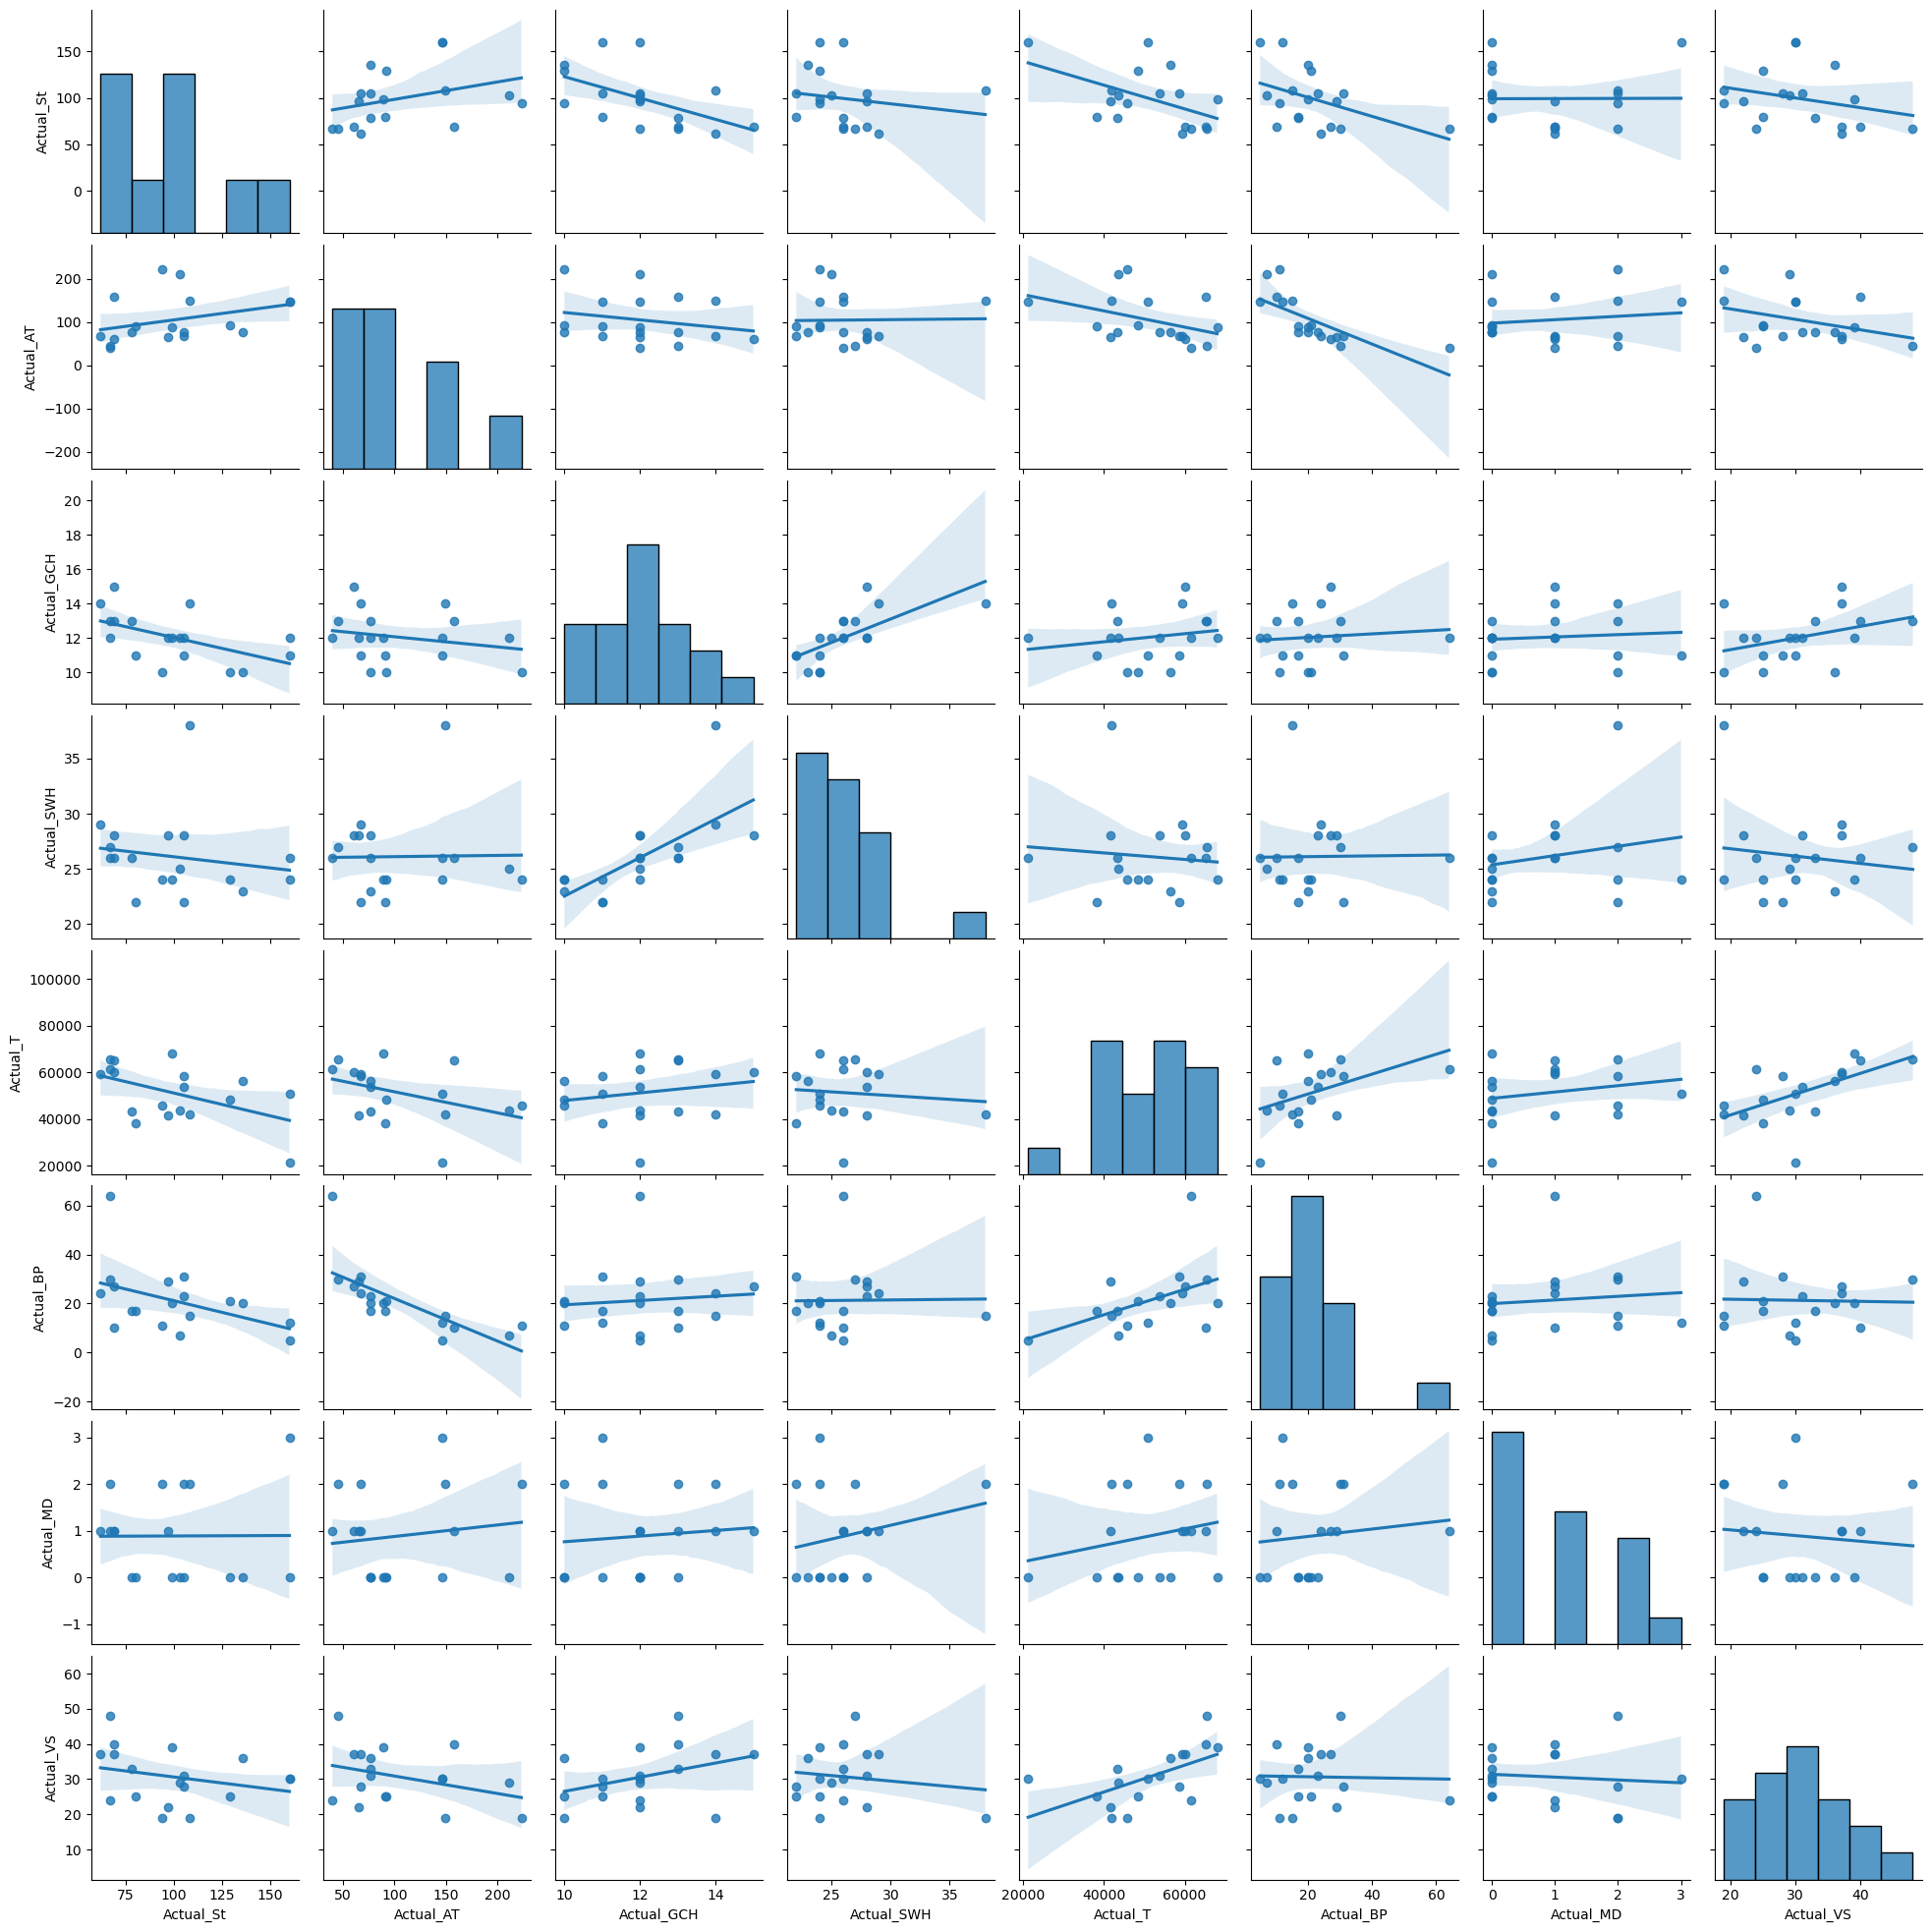

In [9]:
# CPT matrix plot

plt.figure(figsize=(12, 8))
sb.pairplot(CPT.drop(['Date','Port'],axis = 1), kind = 'reg')
plt.show()

C:\Users\0181111\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

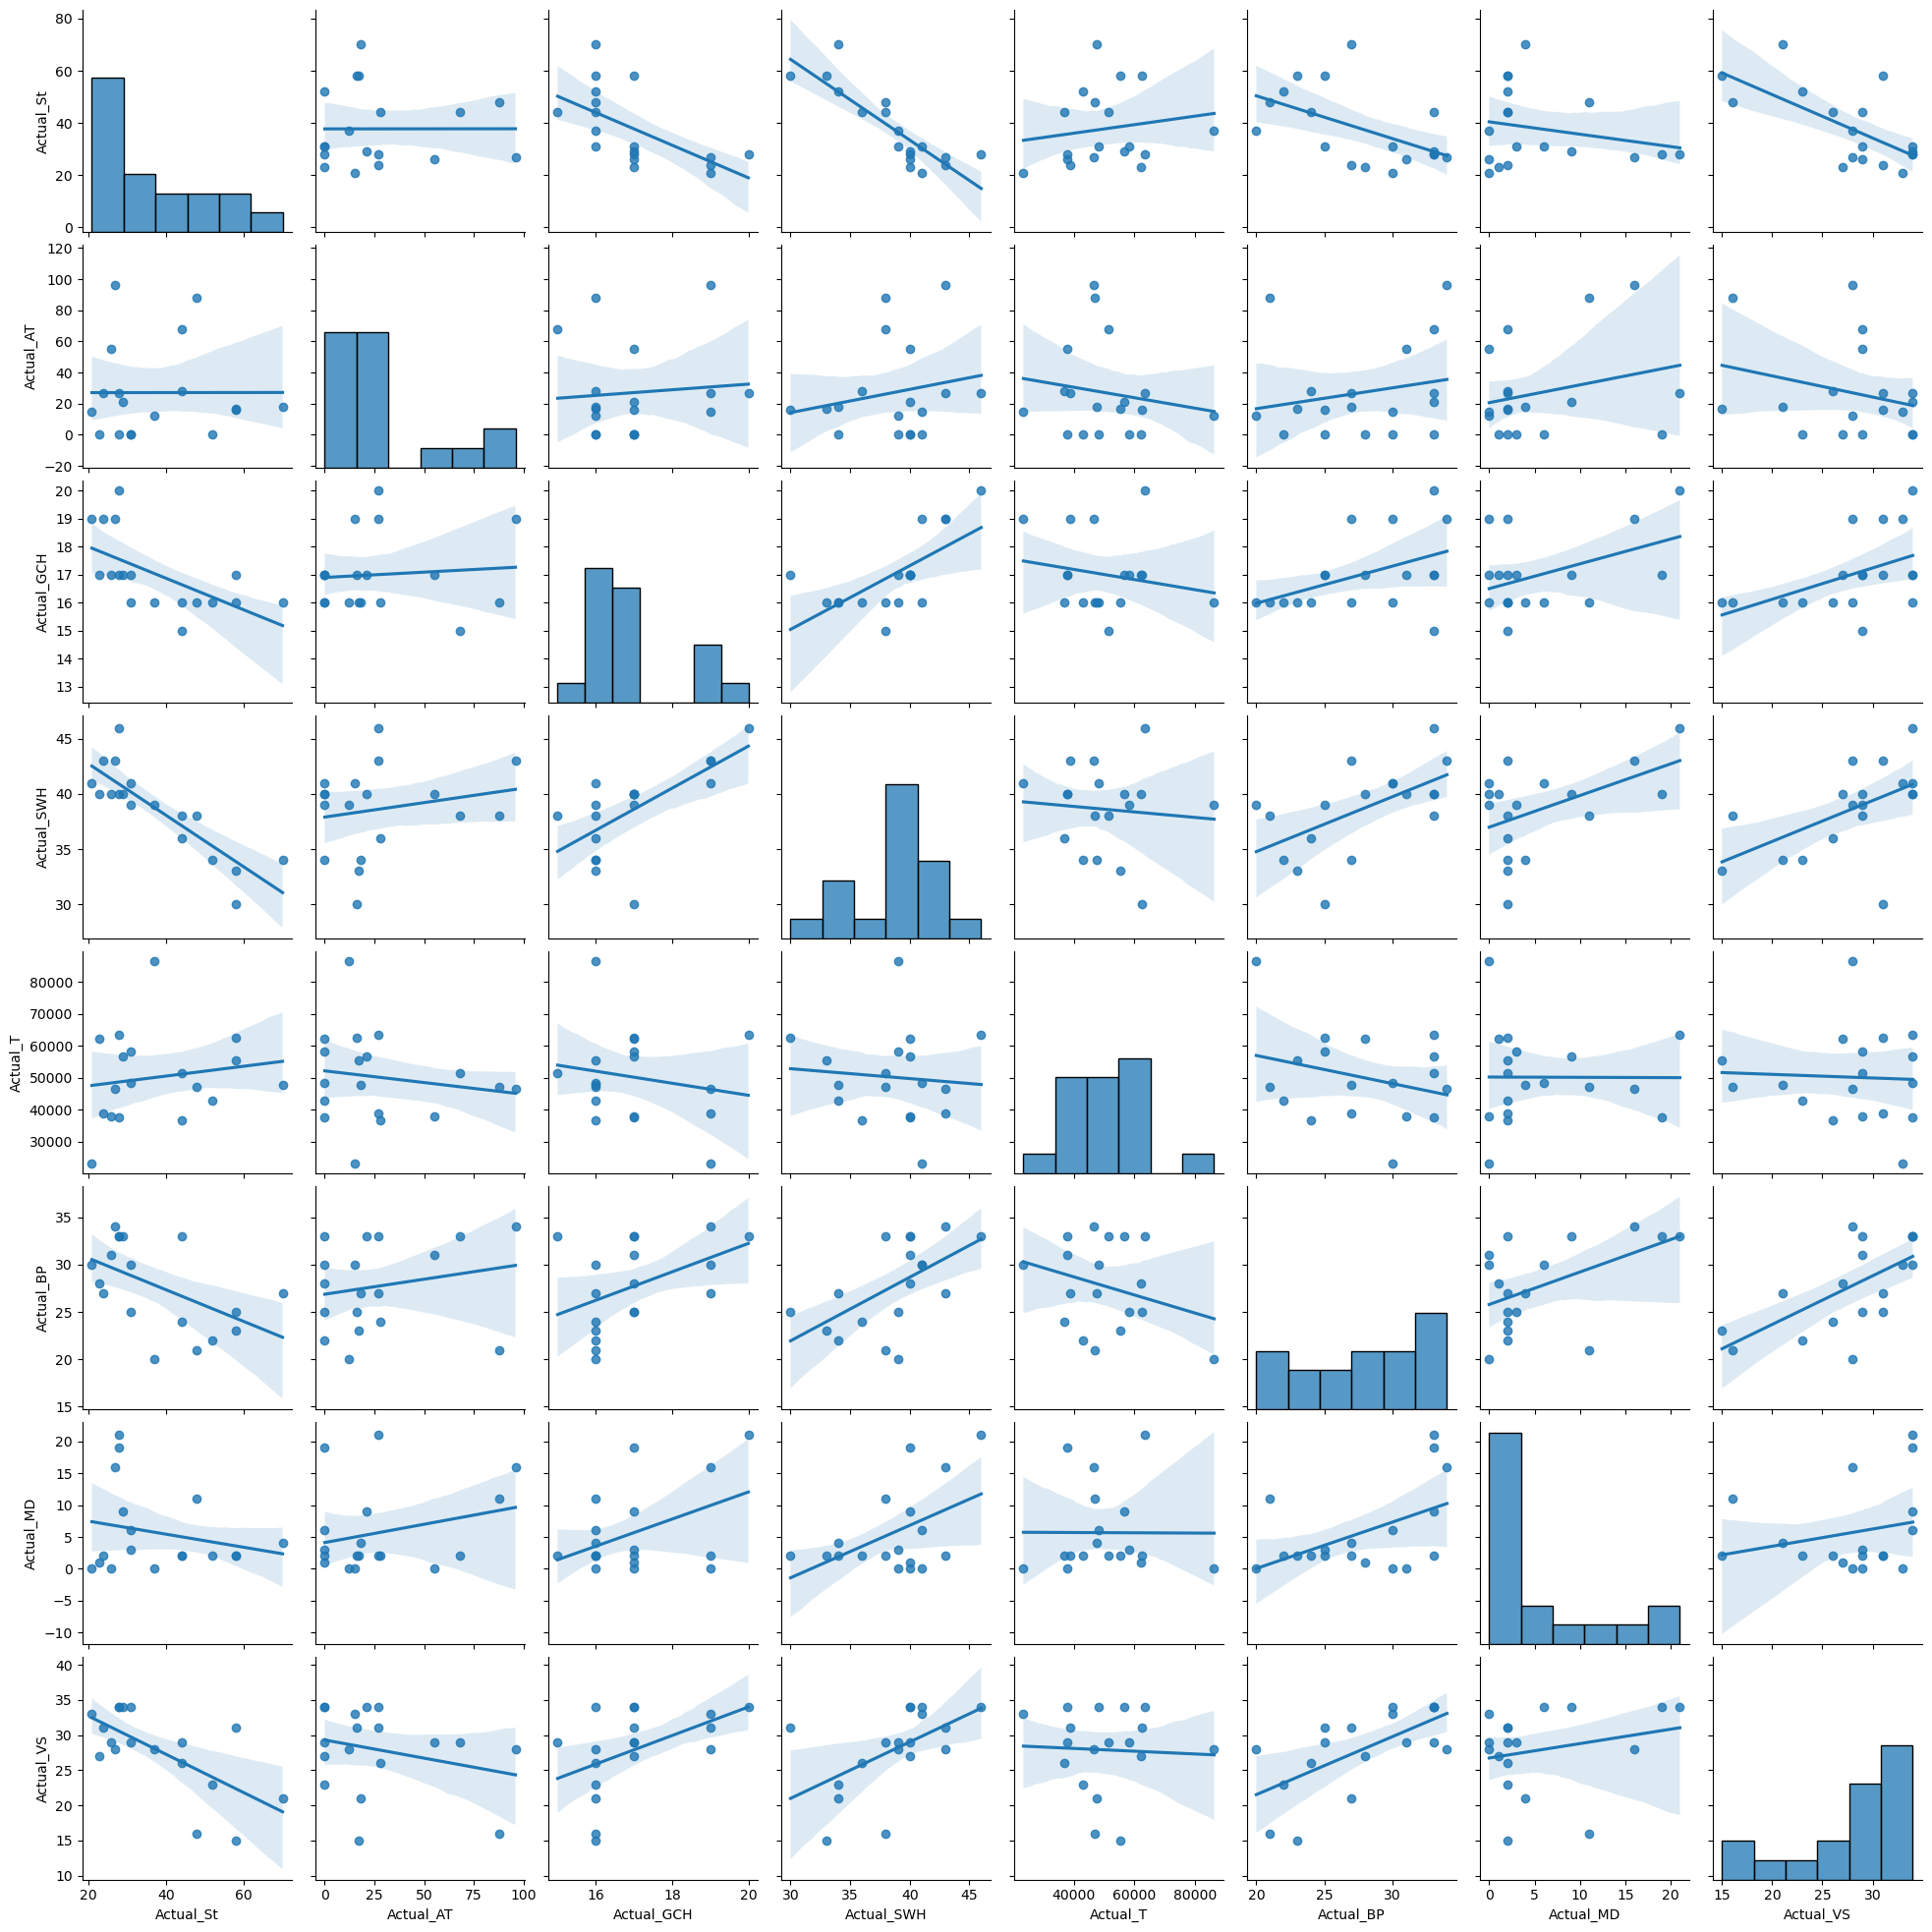

In [10]:
# NGQ matrix plot

plt.figure(figsize=(12, 8))
sb.pairplot(NGQ.drop(['Date','Port'],axis = 1), kind = 'reg')
plt.show()

C:\Users\0181111\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

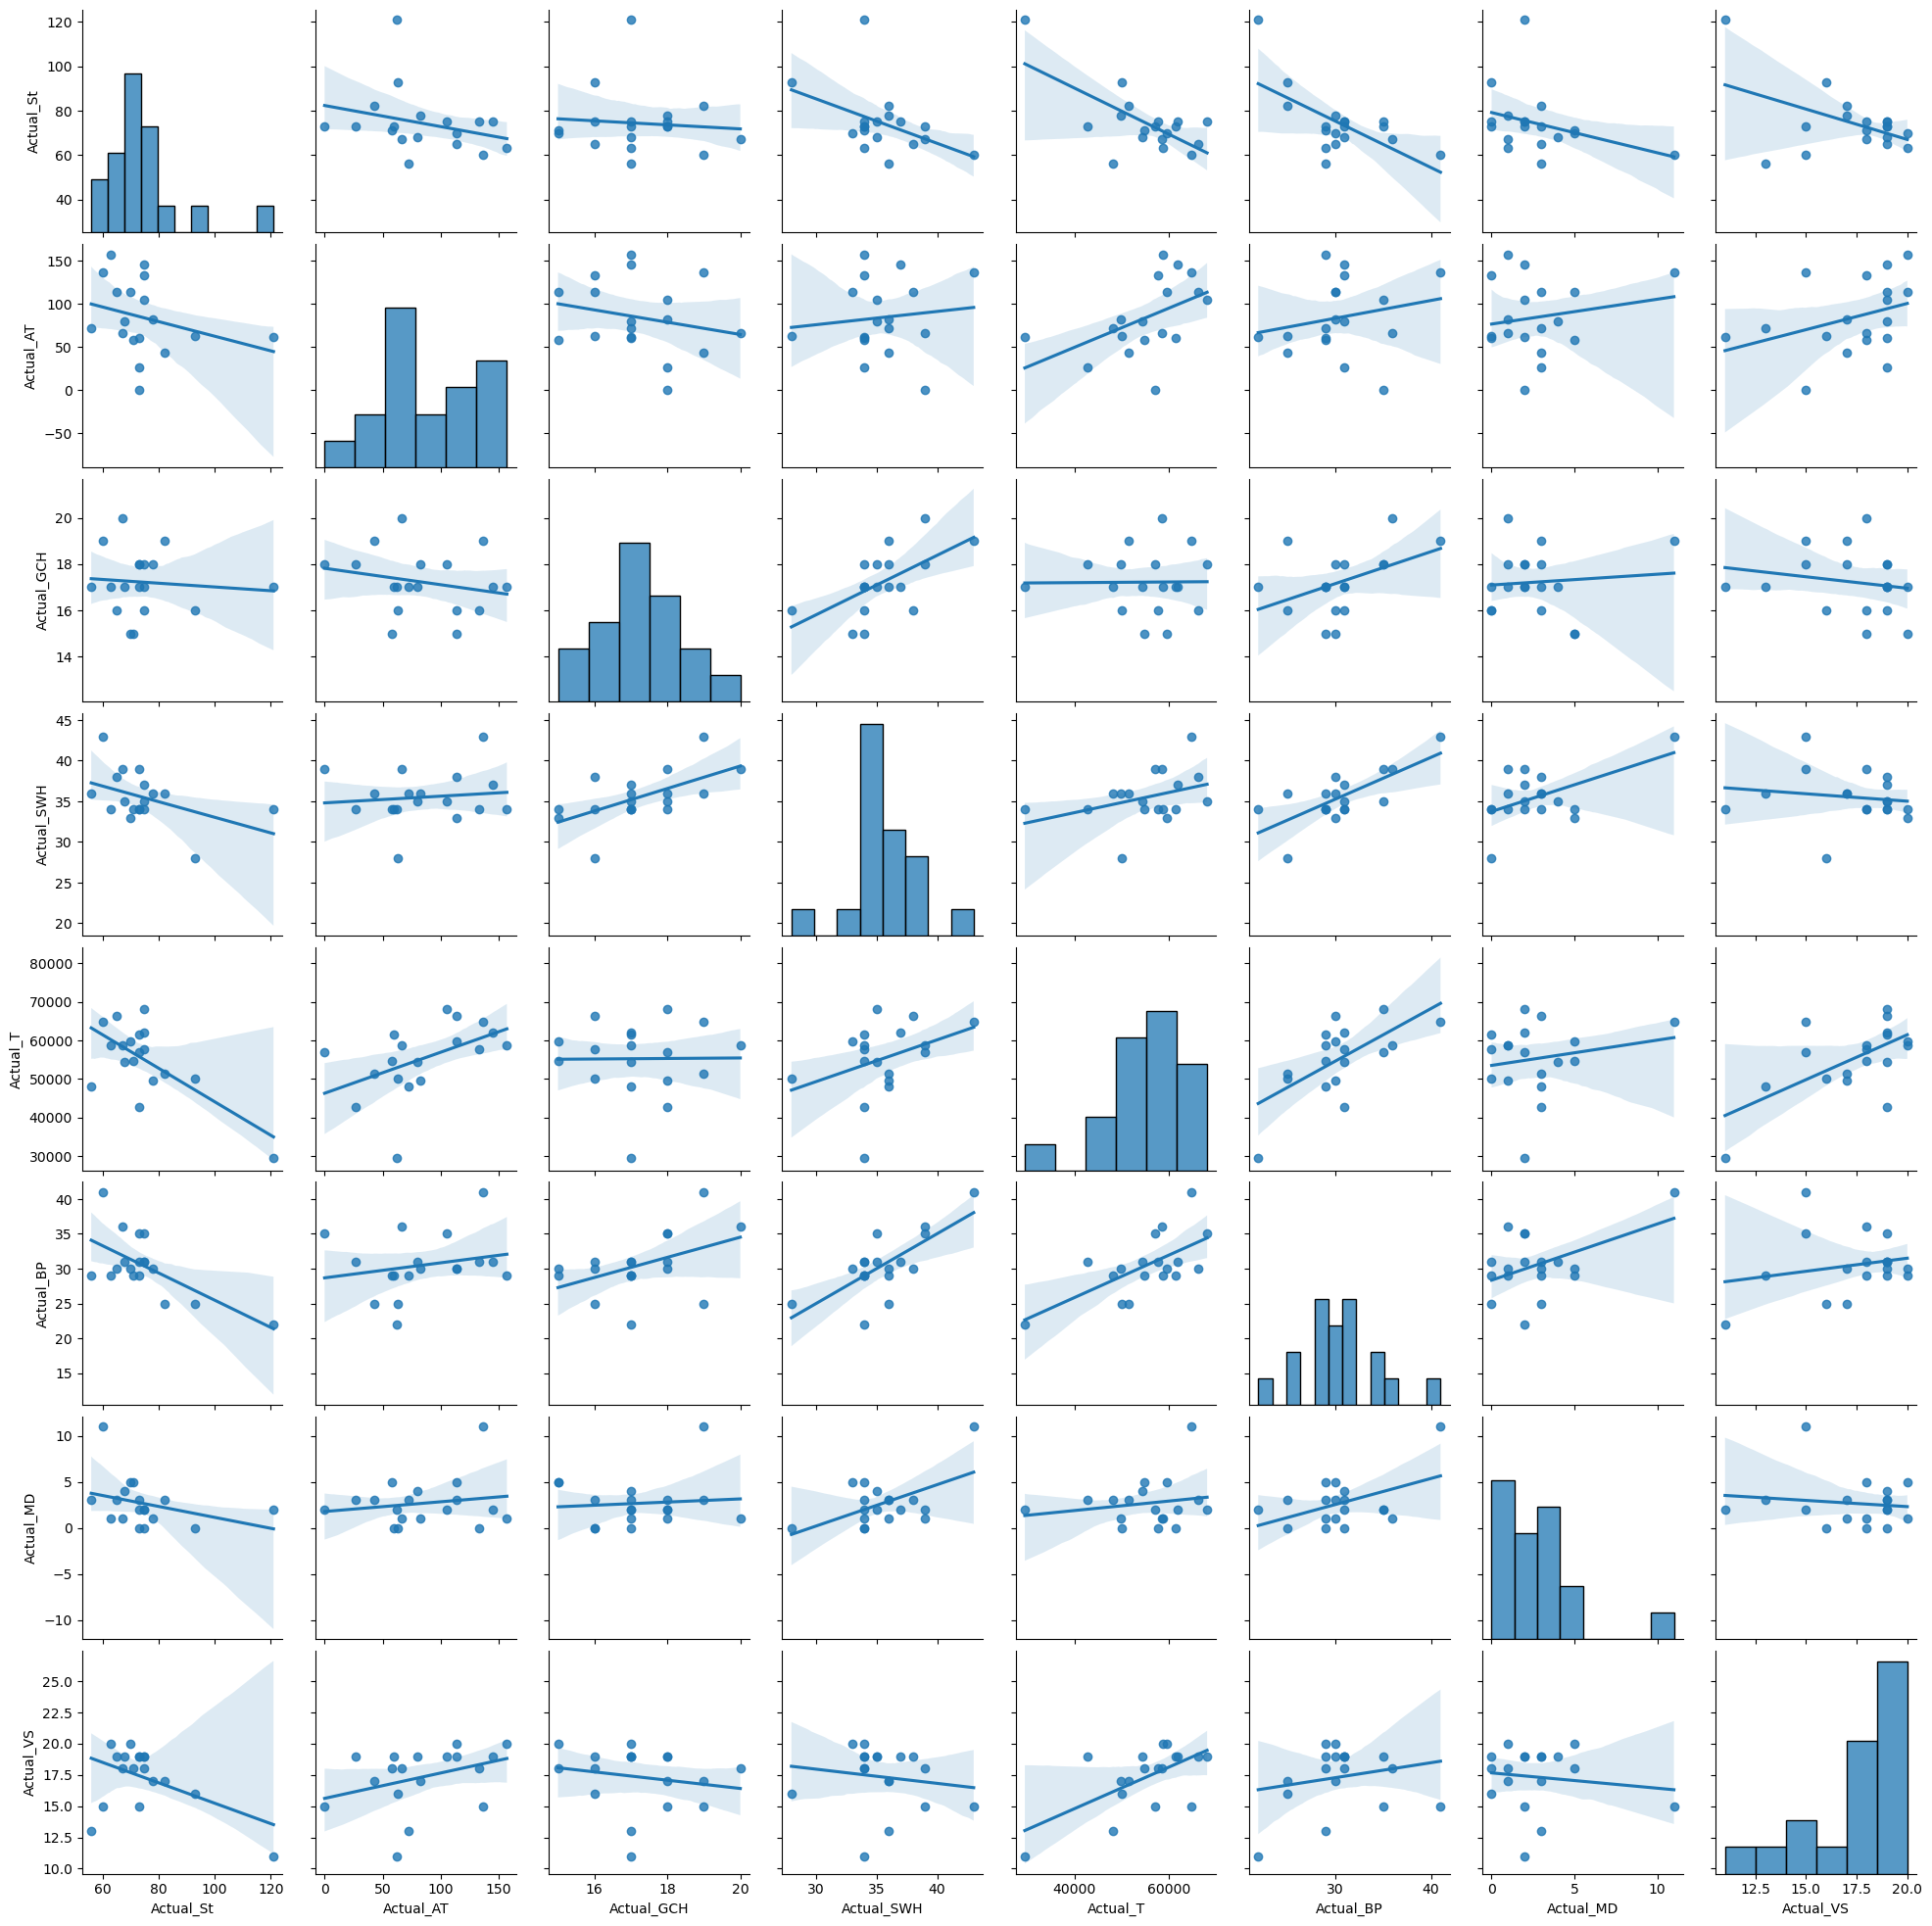

In [11]:
# DNB Pier 1 matrix plot

plt.figure(figsize=(12, 8))
sb.pairplot(DBN1.drop(['Date','Port'],axis = 1), kind = 'reg')
plt.show()

C:\Users\0181111\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

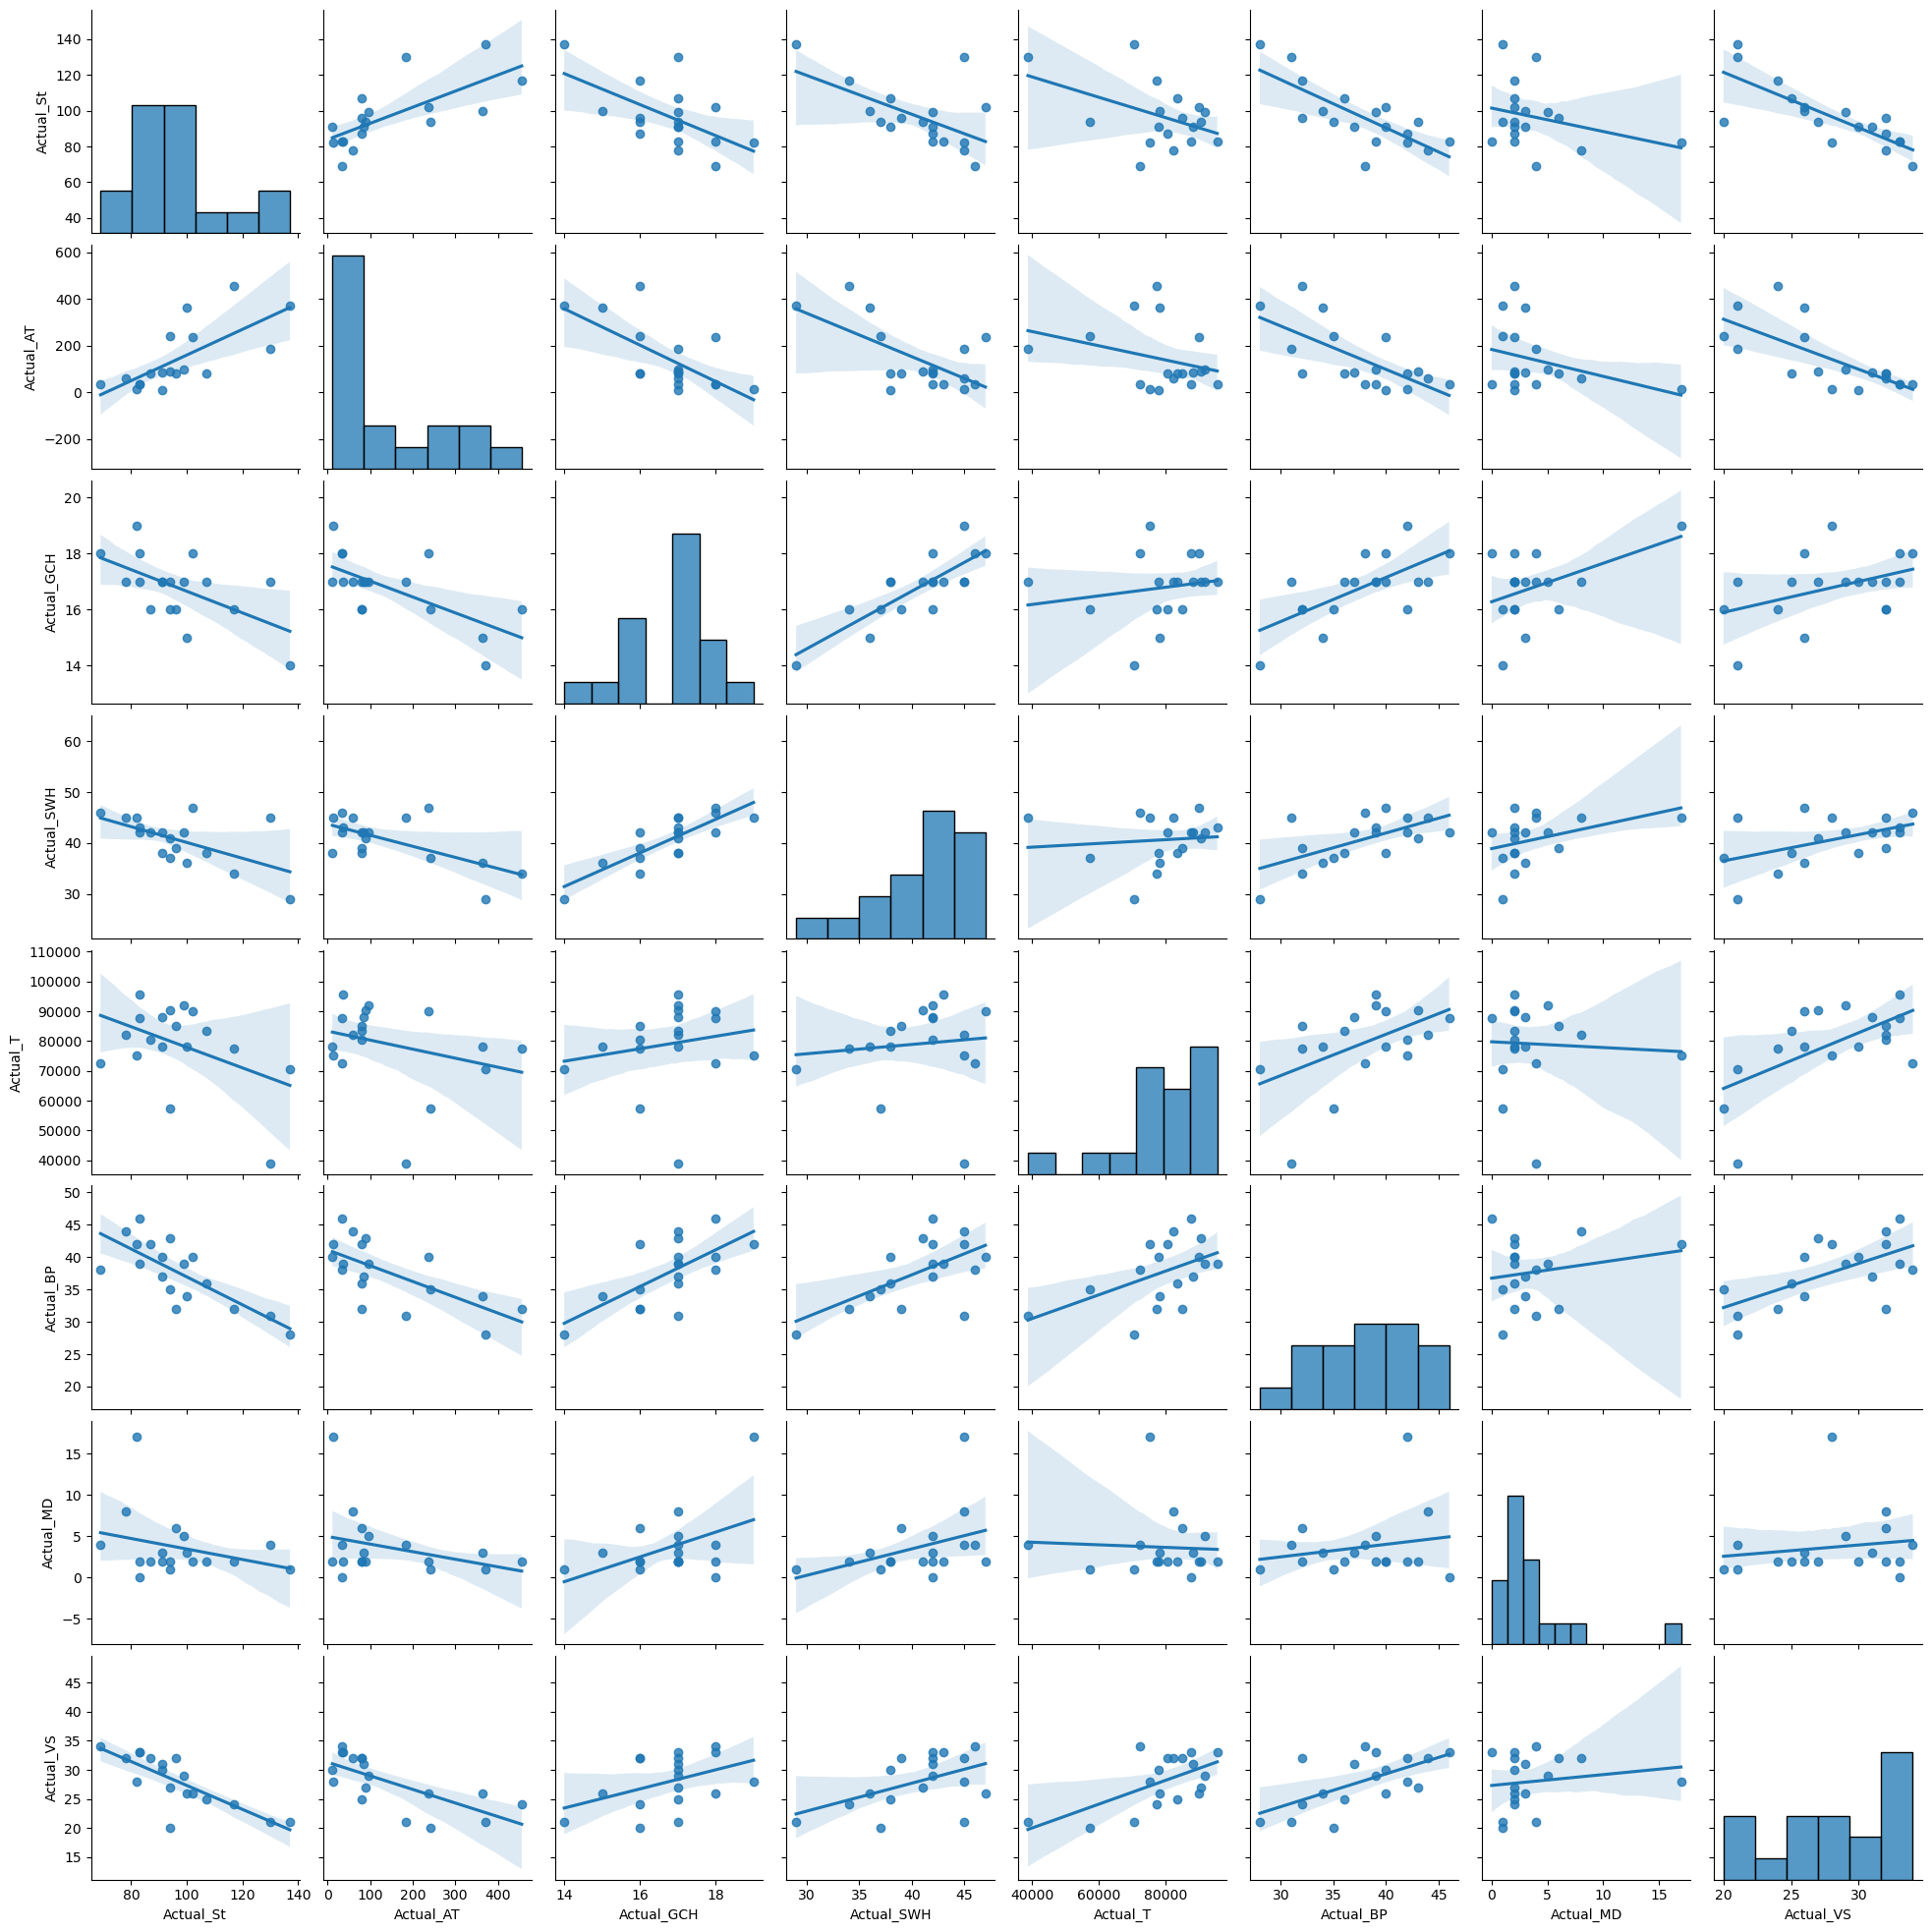

In [12]:
# DBN Pier 2 matrix plot

plt.figure(figsize=(12, 8))
sb.pairplot(DBN2.drop(['Date','Port'],axis = 1), kind = 'reg')
plt.show()

In [16]:
def plot_variable_time_series(dataframes, variable_name):
    plt.figure(figsize=(8, 4))
    for dataframe in dataframes:
        plt.plot(dataframe['Date'], dataframe[variable_name], label=dataframe['Port'].iloc[0],marker = 'o')
    plt.title(f'{variable_name} - All Ports')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

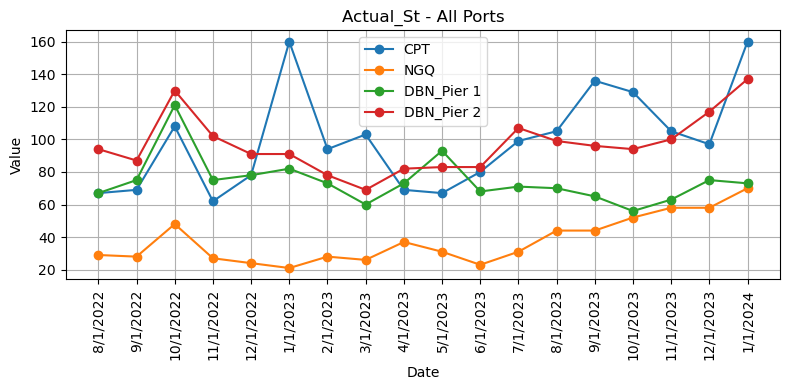

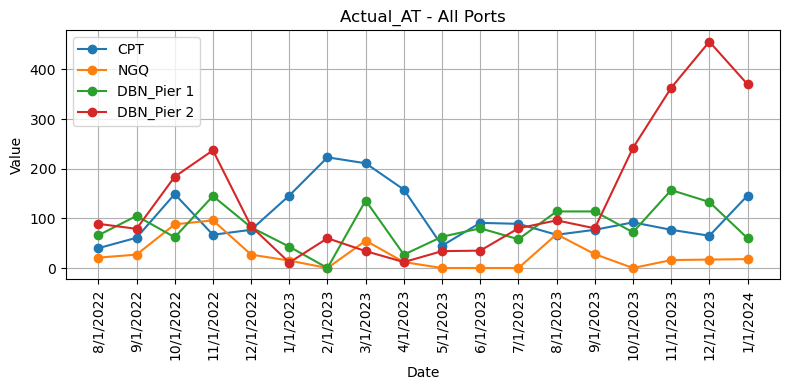

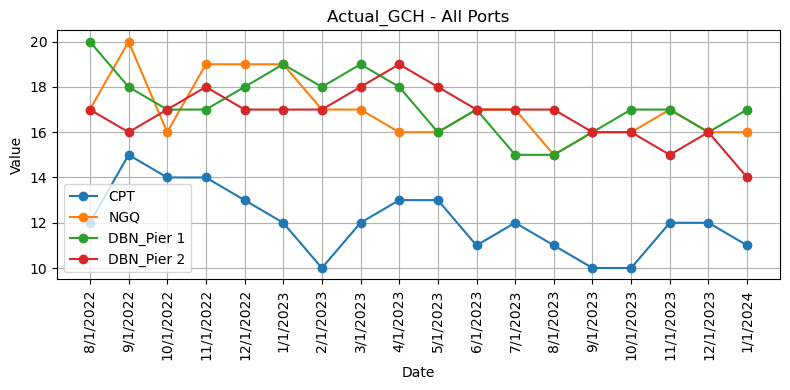

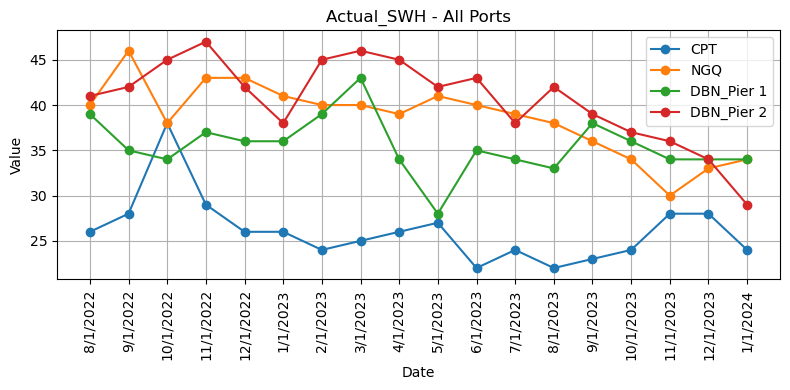

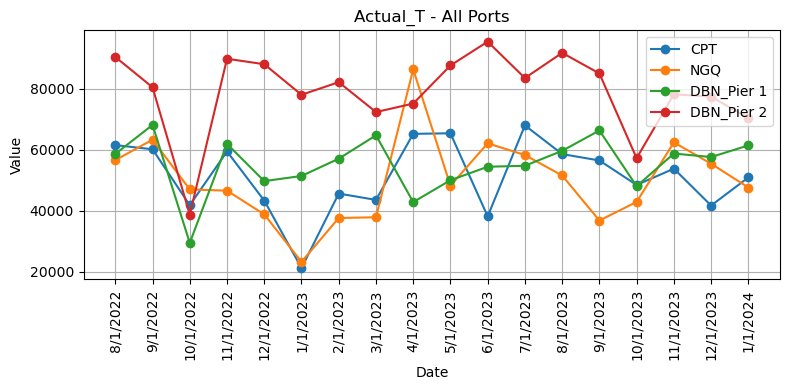

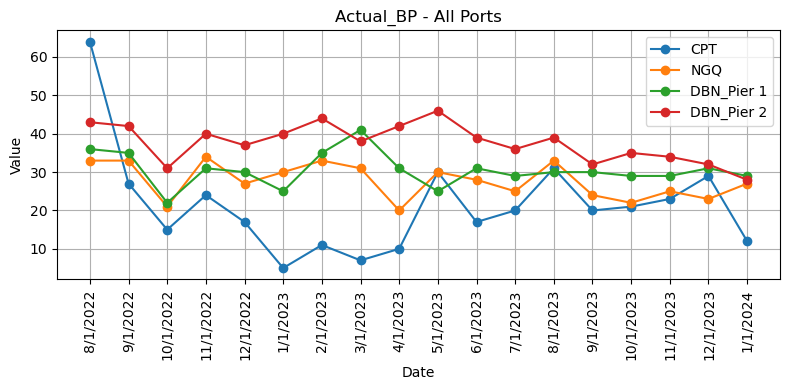

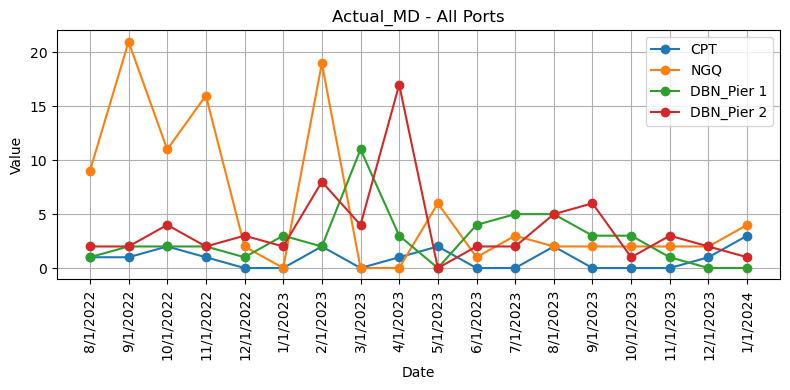

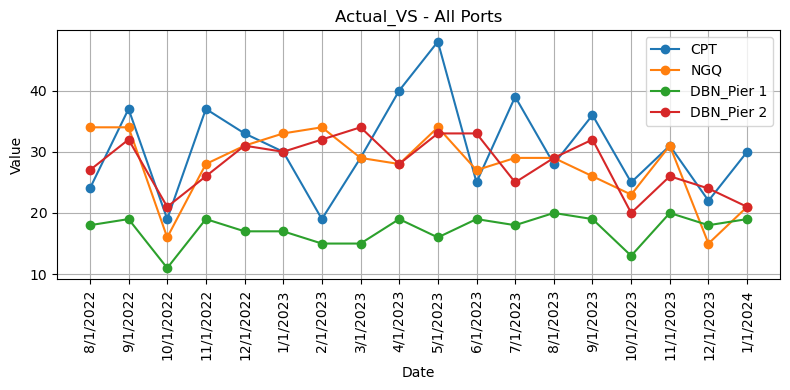

In [17]:
# Assuming CPT, NGQ, DBN1, and DBN2 are loaded dataframes
dataframes = [CPT, NGQ, DBN1, DBN2]
variables = ['Actual_St', 'Actual_AT', 'Actual_GCH', 'Actual_SWH', 'Actual_T', 'Actual_BP', 'Actual_MD', 'Actual_VS']

for variable in variables:
    plot_variable_time_series(dataframes, variable)

In [15]:
ports = [CPT, NGQ, DBN1, DBN2]
port_names = ['CPT', 'NGQ', 'DBN_Pier 1', 'DBN_Pier 2']

for port, port_name in zip(ports, port_names):
    X = port[['Actual_AT', 'Actual_St']]
    y = port['Actual_T']
    
    # Add a constant to the independent variables (for intercept)
    X = sm.add_constant(X)
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    
    # Print regression results
    print(f"Regression results for {port_name}:")
    print(model.summary())
    print("\n")
    

Regression results for CPT:
                            OLS Regression Results                            
Dep. Variable:               Actual_T   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     3.480
Date:                Mon, 26 Feb 2024   Prob (F-statistic):             0.0573
Time:                        08:34:08   Log-Likelihood:                -190.61
No. Observations:                  18   AIC:                             387.2
Df Residuals:                      15   BIC:                             389.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.345e+04   

C:\Users\0181111\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\0181111\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\0181111\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\0181111\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
